# Clustering Modeling Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# supress scientific notation
np.set_printoptions(suppress=True)

from pydataset import data

from env import user, password, host

## 1.

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


- Choose features other than the ones used in the lesson.

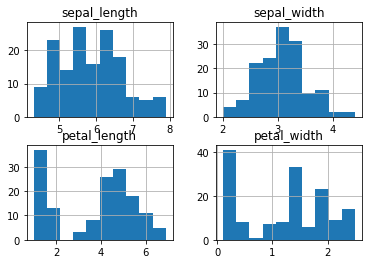

In [3]:
iris.hist();

In [4]:
cols = iris.columns[:4]

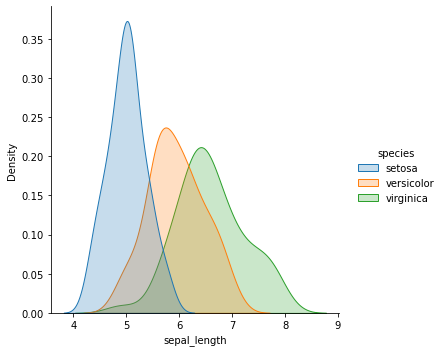

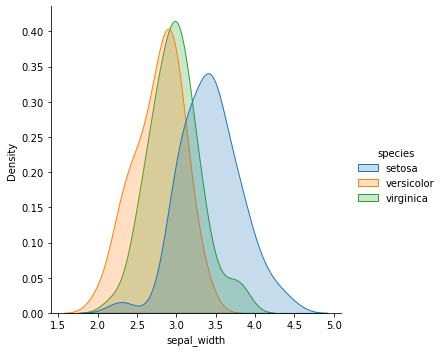

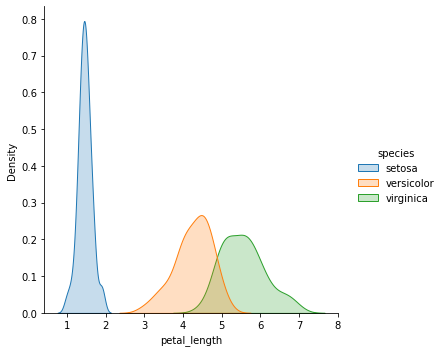

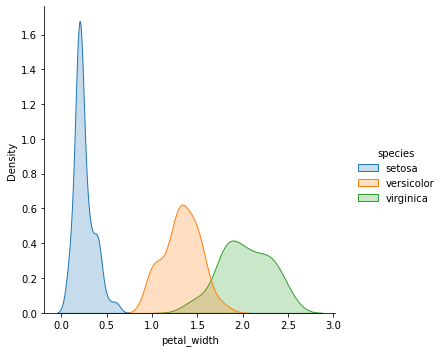

In [5]:
for col in cols:
    sns.displot(data=iris, x=col, kind='kde', hue='species', fill=True);

### petal_length, petal_width, k=3

In [6]:
X = iris[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [7]:
# Scale the X
# make object and fit
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,petal_length,petal_width
1,0.067797,0.041667
2,0.067797,0.041667
3,0.050847,0.041667
4,0.084746,0.041667
5,0.067797,0.041667


***I will just use whole dataset to train model as was done in the lesson***

In [8]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=527)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

# X_scaled['cluster'] = kmeans.predict(X_scaled)

- Visualize the results of your clustering.

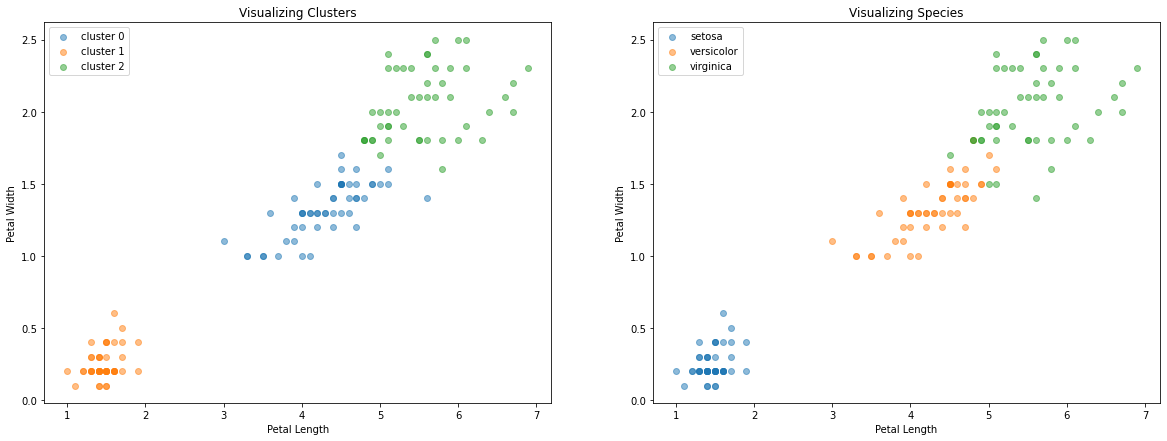

In [10]:
plt.figure(figsize=(20, 7))

plt.subplot(121)

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(x=subset.petal_length, y=subset.petal_width, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Visualizing Clusters')

plt.subplot(122)

for species, subset in iris.groupby('species'):
    plt.scatter(x = subset.petal_length, y = subset.petal_width, label=str(species), alpha=.5)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Visualizing Species')
plt.show()

In [11]:
# get centroids on unscaled data
centroids = iris.groupby('cluster')['petal_length', 'petal_width'].mean()
centroids

,petal_length,petal_width
cluster,,
0,4.296154,1.32500
1,1.462000,0.24600
2,5.566667,2.05625


In [12]:
# another way
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids

,petal_length,petal_width
0,4.296154,1.32500
1,1.462000,0.24600
2,5.566667,2.05625


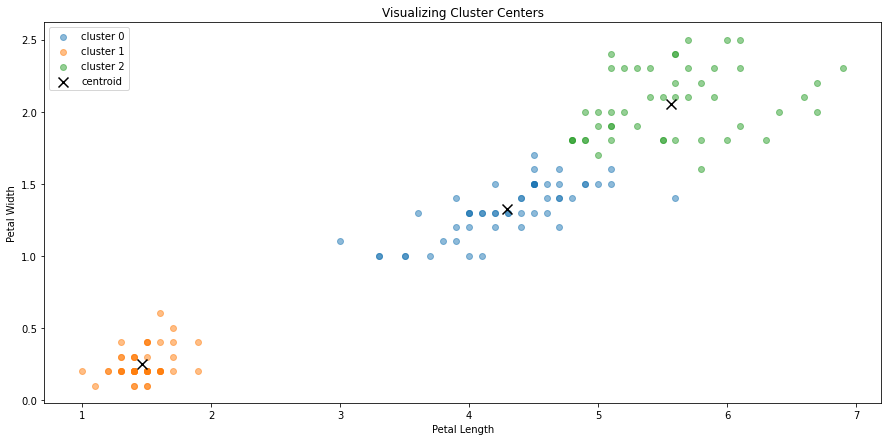

In [13]:
plt.figure(figsize=(15,7))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(x=subset.petal_length, y=subset.petal_width, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='petal_length', y='petal_width', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Visualizing Cluster Centers');

In [14]:
kmeans.inertia_

1.701874688192097

- Use the elbow method to visually select a good value for k.

In [15]:
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

2     5.176464
3     1.701875
4     1.158879
5     0.853862
6     0.680104
7     0.566317
8     0.522390
9     0.415654
10    0.378253
11    0.334401
dtype: float64

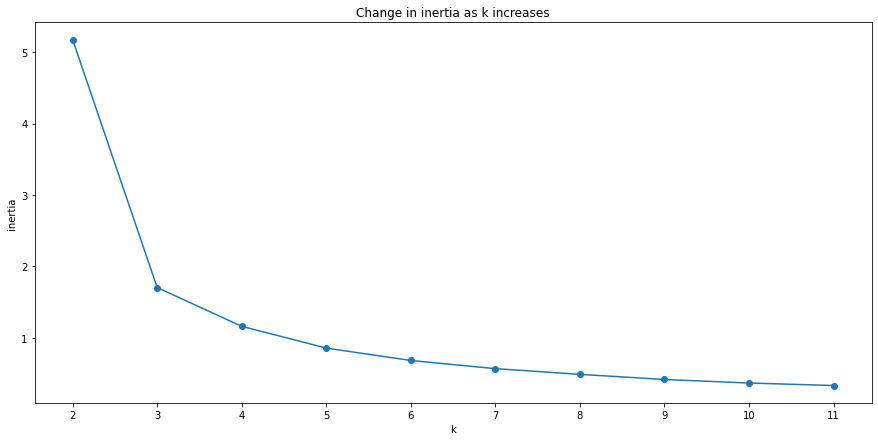

In [16]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 3**

- Repeat the clustering, this time with 3 different features.

### petal_length, petal_width, sepal_length k=3

In [17]:
X = iris[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [18]:
# Scale the X
# make object and fit
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,petal_length,petal_width,sepal_length
1,0.067797,0.041667,0.222222
2,0.067797,0.041667,0.166667
3,0.050847,0.041667,0.111111
4,0.084746,0.041667,0.083333
5,0.067797,0.041667,0.194444


***I will just use whole dataset to train model as was done in the lesson***

In [19]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=527)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [20]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

# X_scaled['cluster'] = kmeans.predict(X_scaled)

- Visualize the results of your clustering *(won't be able to visualize all 3 dimensions, will just take a look at 2 for purposes of these exercises)*

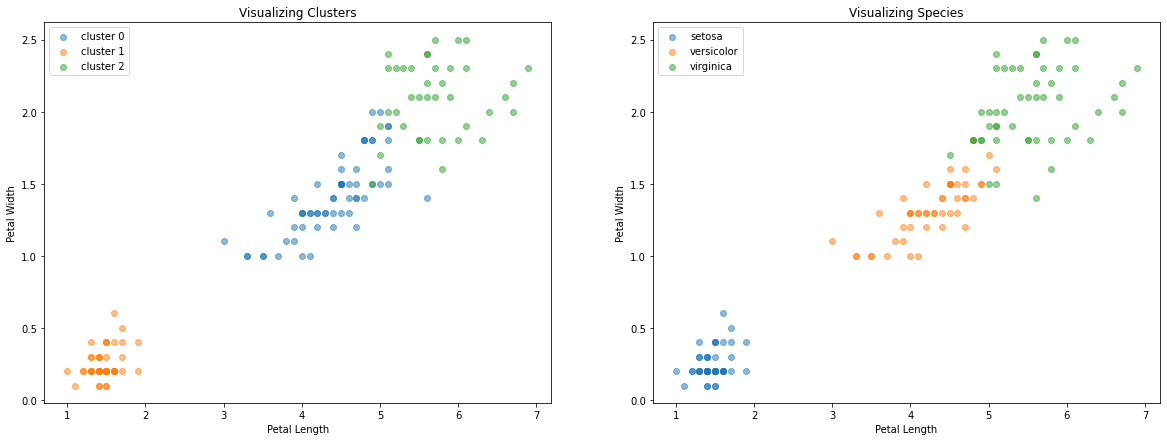

In [21]:
plt.figure(figsize=(20, 7))

plt.subplot(121)

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(x=subset.petal_length, y=subset.petal_width, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Visualizing Clusters')

plt.subplot(122)

for species, subset in iris.groupby('species'):
    plt.scatter(x = subset.petal_length, y = subset.petal_width, label=str(species), alpha=.5)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Visualizing Species')
plt.show()

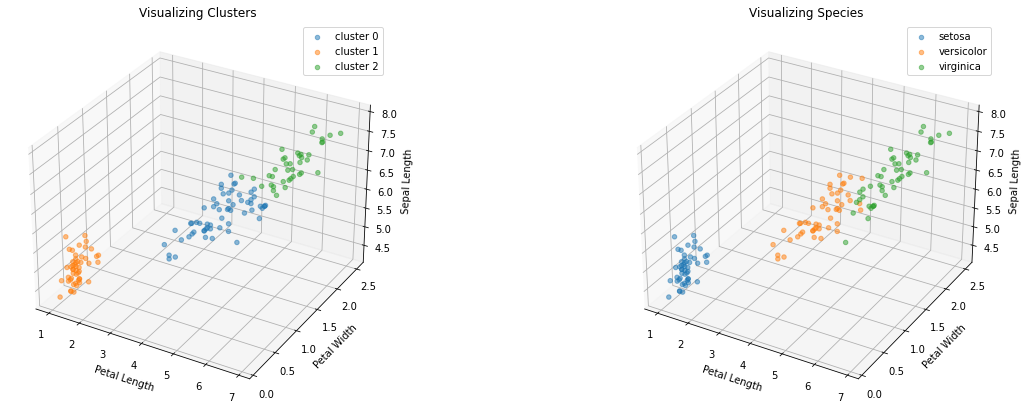

In [22]:
# 3d plots
plt.figure(figsize=(20, 7))

ax = plt.subplot(121, projection='3d')

for cluster, subset in iris.groupby('cluster'):
    ax.scatter(xs=subset.petal_length, ys=subset.petal_width, zs=subset.sepal_length, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
plt.title('Visualizing Clusters')

ax2 = plt.subplot(122, projection='3d')

for species, subset in iris.groupby('species'):
    ax2.scatter(xs = subset.petal_length, ys = subset.petal_width, zs=subset.sepal_length, label=str(species), alpha=.5)

plt.legend()
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')
ax2.set_zlabel('Sepal Length')
plt.title('Visualizing Species')
plt.show()

In [23]:
# get centroids on unscaled data
centroids = iris.groupby('cluster')['petal_length', 'petal_width', 'sepal_length'].mean()
centroids

,petal_length,petal_width,sepal_length
cluster,,,
0,4.391803,1.409836,5.900000
1,1.462000,0.246000,5.006000
2,5.710256,2.092308,6.828205


In [24]:
# another way
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids

,petal_length,petal_width,sepal_length
0,4.391803,1.409836,5.900000
1,1.462000,0.246000,5.006000
2,5.710256,2.092308,6.828205


In [25]:
# # did take time to figure out how to label centroids on 3d plots
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# for cluster, subset in iris.groupby('cluster'):
#     ax.scatter(xs=subset.petal_length, ys=subset.petal_width, zs=subset.sepal_length, label='cluster ' + str(cluster), alpha=.5)

# ax.scatter(xs=centroids.petal_length, ys=centroids.petal_width, zs=centroids.sepal_length, c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

# plt.legend()
# plt.xlabel('Petal Length')
# plt.ylabel('Petal Width')
# plt.title('Visualizing Cluster Centers');

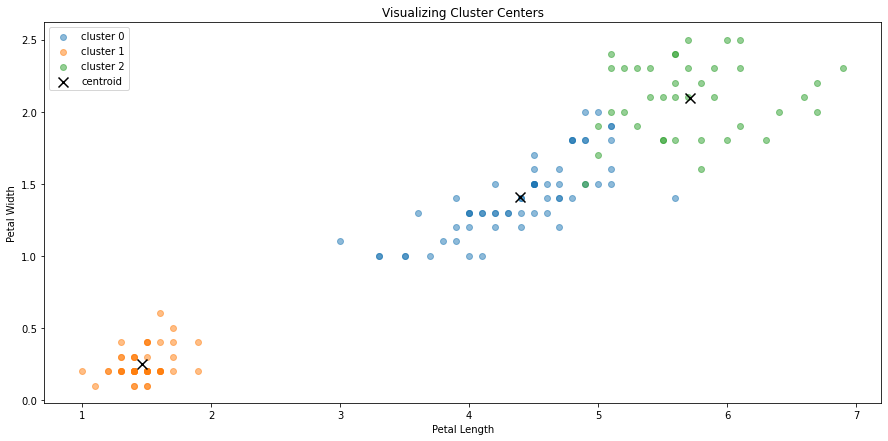

In [26]:
plt.figure(figsize=(15,7))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(x=subset.petal_length, y=subset.petal_width, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='petal_length', y='petal_width', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Visualizing Cluster Centers');

In [27]:
kmeans.inertia_

4.309118210436726

- Use the elbow method to visually select a good value for k.

In [28]:
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

2     8.605290
3     4.309118
4     3.042489
5     2.374074
6     2.000576
7     1.688335
8     1.497511
9     1.361186
10    1.233537
11    1.120987
dtype: float64

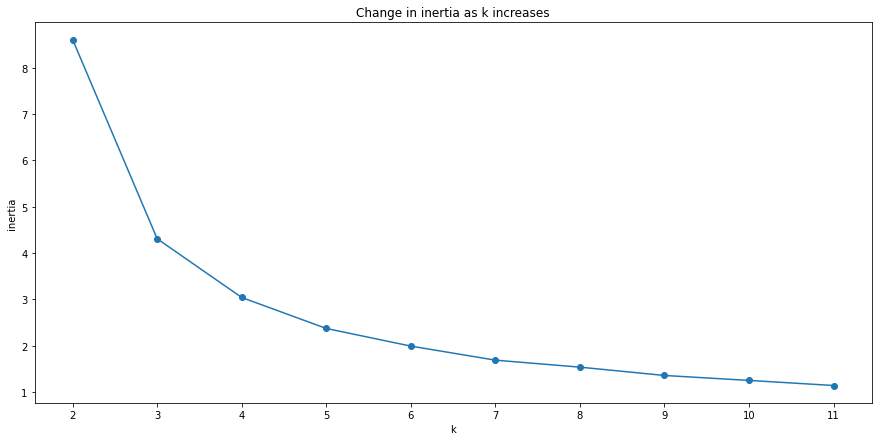

In [29]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 3**

## 2.

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [30]:
# acquire data
mall = pd.read_sql('select * from customers;', f'mysql+pymysql://{user}:{password}@{host}/mall_customers', index_col='customer_id')
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


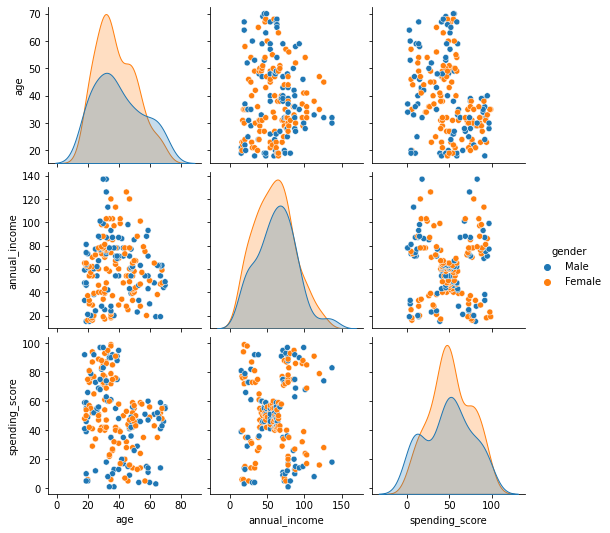

In [31]:
# let's take a look
sns.pairplot(mall, hue='gender');
# spending_score vs annual_income has most obvious potential clusters (5 clusters)

### spending_score, annual_income, k=5

In [32]:
X = mall[['spending_score', 'annual_income']]
X.head()

,spending_score,annual_income
customer_id,,
1,39,15
2,81,15
3,6,16
4,77,16
5,40,17


In [33]:
# Scale the X
# make object and fit
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,spending_score,annual_income
1,0.387755,0.000000
2,0.816327,0.000000
3,0.051020,0.008197
4,0.775510,0.008197
5,0.397959,0.016393


***I will just use whole dataset to train model as was done in the lesson***

In [34]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state=527)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [35]:
# make a new column names cluster in iris and X_scaled dataframe

mall['cluster'] = kmeans.predict(X_scaled)

# X_scaled['cluster'] = kmeans.predict(X_scaled)

- Visualize the results of your clustering

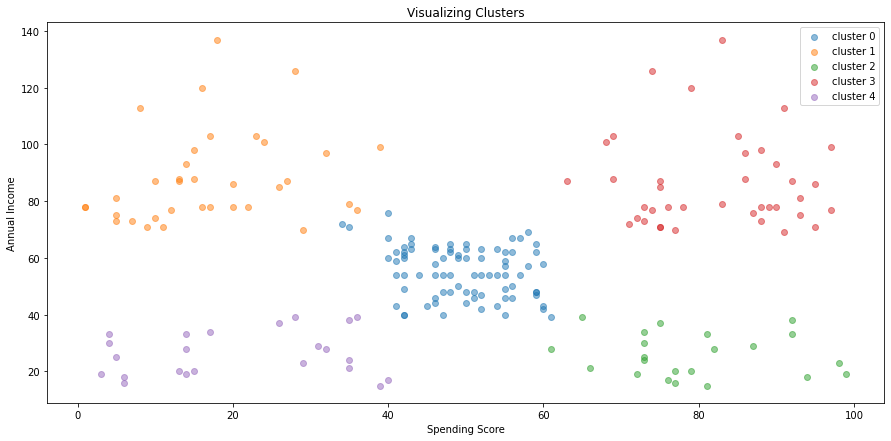

In [36]:
plt.figure(figsize=(15, 7))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(x=subset.spending_score, y=subset.annual_income, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Visualizing Clusters');

In [37]:
# get centroids on unscaled data
centroids = mall.groupby('cluster')['spending_score', 'annual_income'].mean()
centroids

,spending_score,annual_income
cluster,,
0,49.518519,55.296296
1,17.114286,88.200000
2,79.363636,25.727273
3,82.128205,86.538462
4,20.913043,26.304348


In [38]:
# another way
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids

,spending_score,annual_income
0,49.518519,55.296296
1,17.114286,88.200000
2,79.363636,25.727273
3,82.128205,86.538462
4,20.913043,26.304348


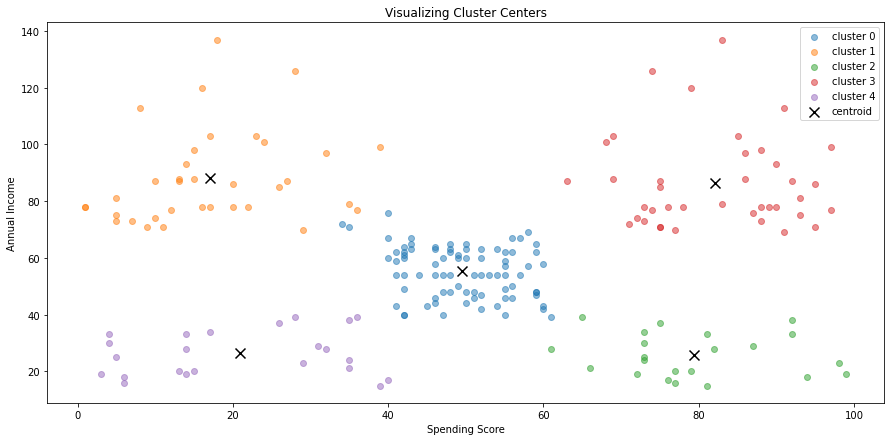

In [39]:
plt.figure(figsize=(15,7))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(x=subset.spending_score, y=subset.annual_income, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='spending_score', y='annual_income', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Visualizing Cluster Centers');

In [40]:
kmeans.inertia_

3.583117905952559

- Use the elbow method to visually select a good value for k.

In [41]:
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

2     13.993505
3      9.058985
4      6.110312
5      3.583118
6      3.102393
7      2.625251
8      2.340283
9      1.887272
10     1.645642
11     1.473473
dtype: float64

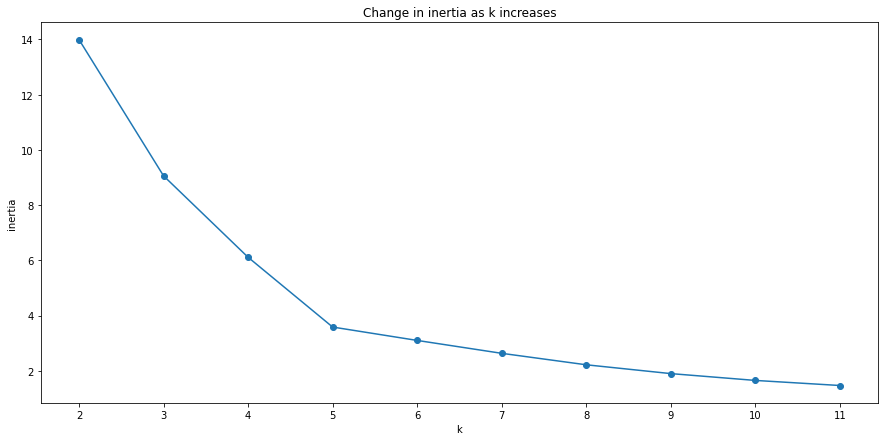

In [42]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 5**

## 3.

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

**Repeat above process for mall data without scaling to see how it affects clusters**

### spending_score, annual_income, k=5 (unscaled)

In [43]:
X = mall[['spending_score', 'annual_income']]
X.head()

,spending_score,annual_income
customer_id,,
1,39,15
2,81,15
3,6,16
4,77,16
5,40,17


***I will just use whole dataset to train model as was done in the lesson***

In [44]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state=527)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [45]:
# make a new column names cluster in iris and X_scaled dataframe

mall['cluster'] = kmeans.predict(X)

# X['cluster'] = kmeans.predict(X)

- Visualize the results of your clustering *(won't be able to visualize all 3 dimensions, will just take a look at 2 for purposes of these exercises)*

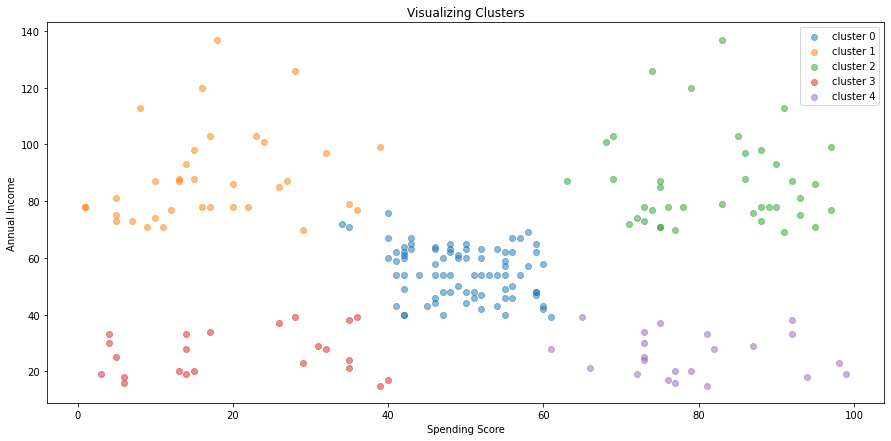

In [46]:
plt.figure(figsize=(15, 7))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(x=subset.spending_score, y=subset.annual_income, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Visualizing Clusters');

In [47]:
# get centroids on unscaled data
centroids = mall.groupby('cluster')['spending_score', 'annual_income'].mean()
centroids

,spending_score,annual_income
cluster,,
0,49.518519,55.296296
1,17.114286,88.200000
2,82.128205,86.538462
3,20.913043,26.304348
4,79.363636,25.727273


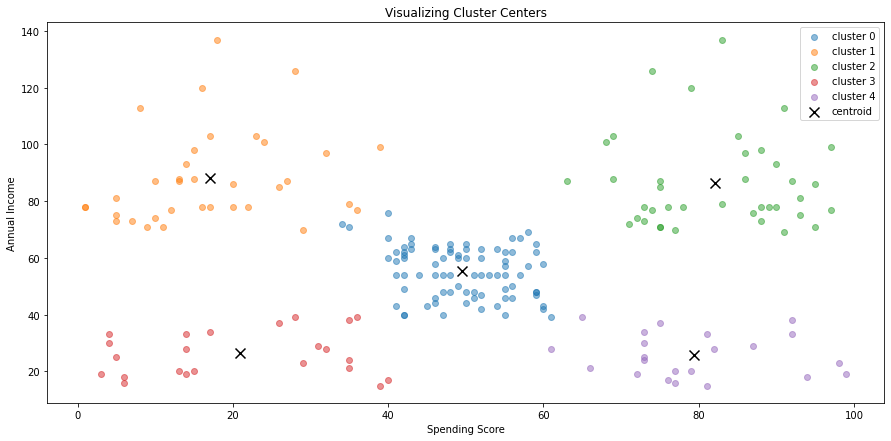

In [48]:
plt.figure(figsize=(15,7))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(x=subset.spending_score, y=subset.annual_income, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='spending_score', y='annual_income', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Visualizing Cluster Centers');

In [49]:
kmeans.inertia_

44448.45544793369

- Use the elbow method to visually select a good value for k.

In [50]:
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)})

2     181363.595960
3     106348.373062
4      73679.789039
5      44448.455448
6      37271.886237
7      30227.606513
8      25062.382237
9      21806.812999
10     19646.482019
11     17595.288881
dtype: float64

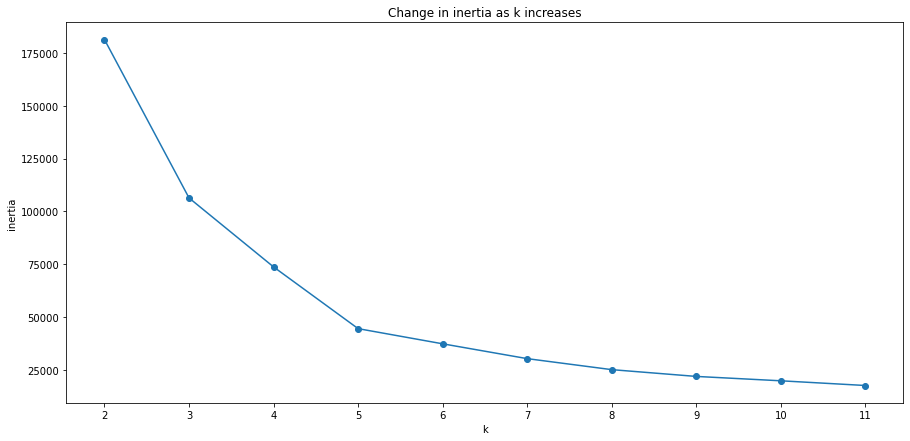

In [51]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 4?**

**Takeaways:**
- inertia is much higher (makes sense since distance will be much greater if unscaled)
- inertia vs k chart is much less decipherable
    - Model isn't finding as good of clusters

## Bonus

### x, y, k=2 (unscaled)

- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [52]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


- b) Visualize the data and guess the number and shape of the clusters.

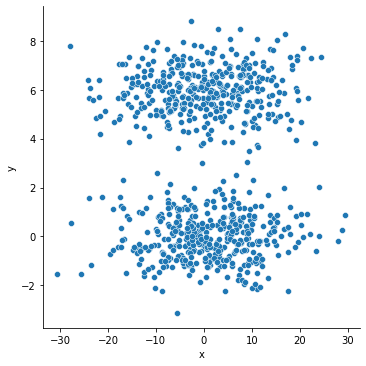

In [53]:
sns.relplot(x=df.x, y=df.y);

- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [54]:
X = df[['x', 'y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


***I will just use whole dataset to train model as was done in the lesson***

In [55]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state=527)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
# kmeans.predict(X)

KMeans(n_clusters=2, random_state=527)

In [56]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X)

# X['cluster'] = kmeans.predict(X)

- Visualize the results of your clustering

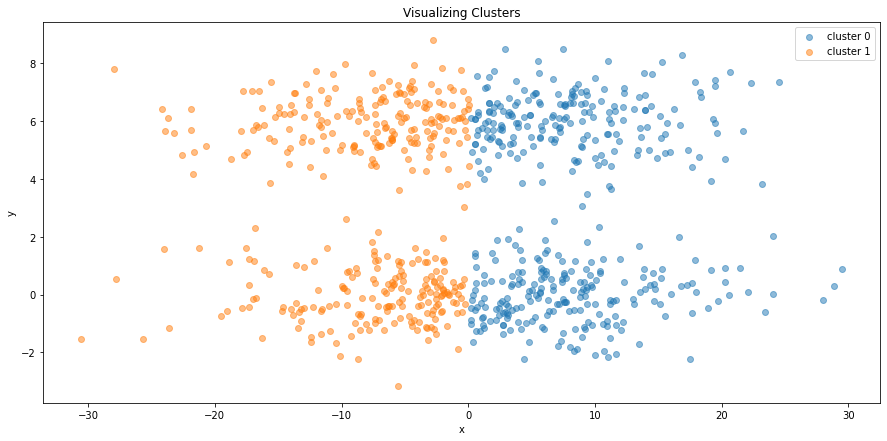

In [57]:
plt.figure(figsize=(15, 7))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(x=subset.x, y=subset.y, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Clusters');

In [58]:
# get centroids on unscaled data
centroids = df.groupby('cluster')['x', 'y'].mean()
centroids

,x,y
cluster,,
0,8.140093,2.899115
1,-7.842407,3.054280


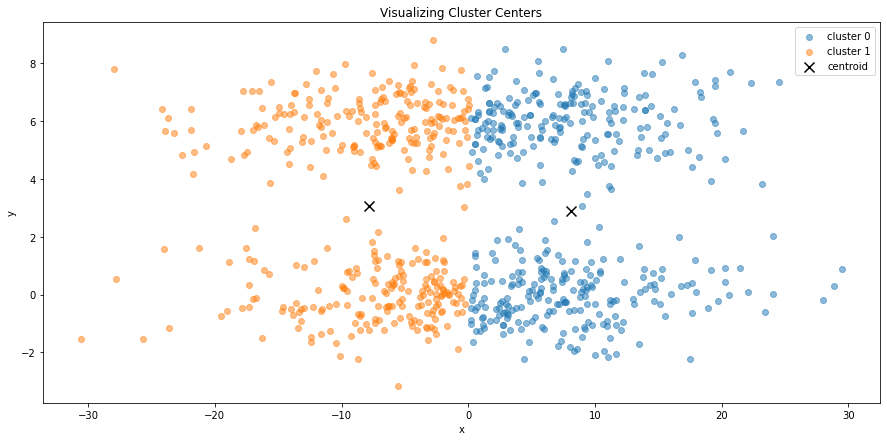

In [59]:
plt.figure(figsize=(15,7))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(x=subset.x, y=subset.y, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='x', y='y', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Cluster Centers');

In [60]:
kmeans.inertia_

35379.036324112

- Use the elbow method to visually select a good value for k.

In [61]:
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)})

2     35379.036324
3     22829.249517
4     16814.852030
5     13778.320299
6     11429.057870
7      9530.839448
8      7891.307143
9      6775.400719
10     5785.018542
11     5100.569948
dtype: float64

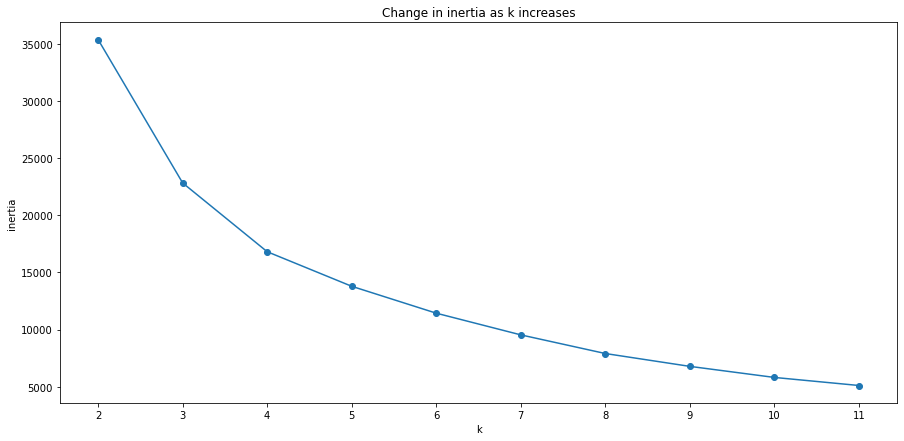

In [62]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 4 or 5?**

- d) Repeat the step above but with scaled data.

### x, y, k=2

In [63]:
X = df[['x', 'y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [64]:
# Scale the X
# make object and fit
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,x,y
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807


***I will just use whole dataset to train model as was done in the lesson***

In [65]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state=527)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
# kmeans.predict(X_scaled)

KMeans(n_clusters=2, random_state=527)

In [66]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

# X_scaled['cluster'] = kmeans.predict(X_scaled)

- Visualize the results of your clustering

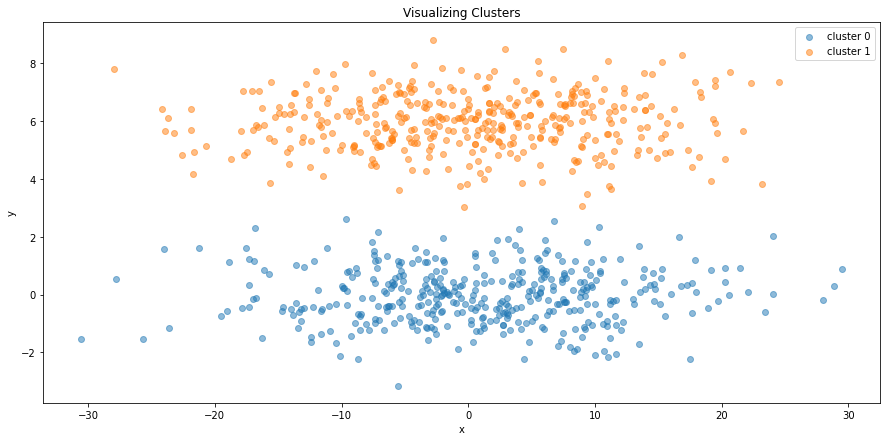

In [67]:
plt.figure(figsize=(15, 7))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(x=subset.x, y=subset.y, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Clusters');

In [68]:
# get centroids on unscaled data
centroids = df.groupby('cluster')['x', 'y'].mean()
centroids

,x,y
cluster,,
0,0.891644,-0.034656
1,0.127166,5.966066


In [69]:
# another way
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids

,x,y
0,0.891644,-0.034656
1,0.127166,5.966066


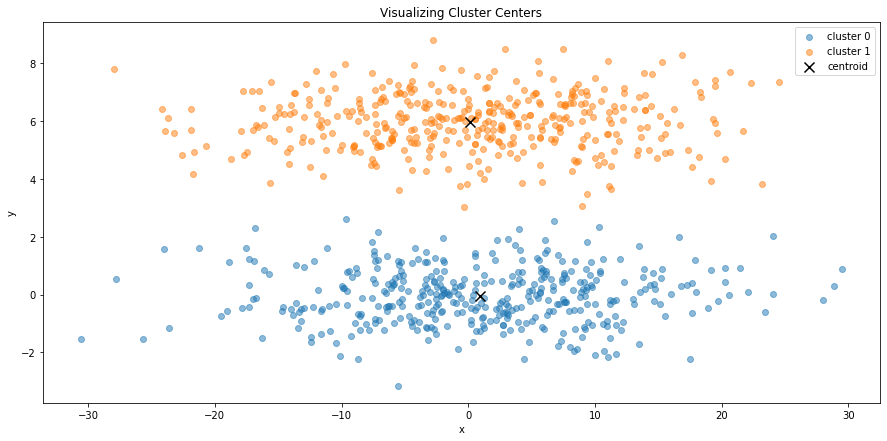

In [70]:
plt.figure(figsize=(15,7))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(x=subset.x, y=subset.y, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='x', y='y', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Cluster Centers');

In [71]:
kmeans.inertia_

27.002656304673405

- Use the elbow method to visually select a good value for k.

In [72]:
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

2     27.002656
3     19.581061
4     12.860252
5     10.997578
6      9.416636
7      8.451194
8      7.619472
9      6.814572
10     6.125250
11     5.554406
dtype: float64

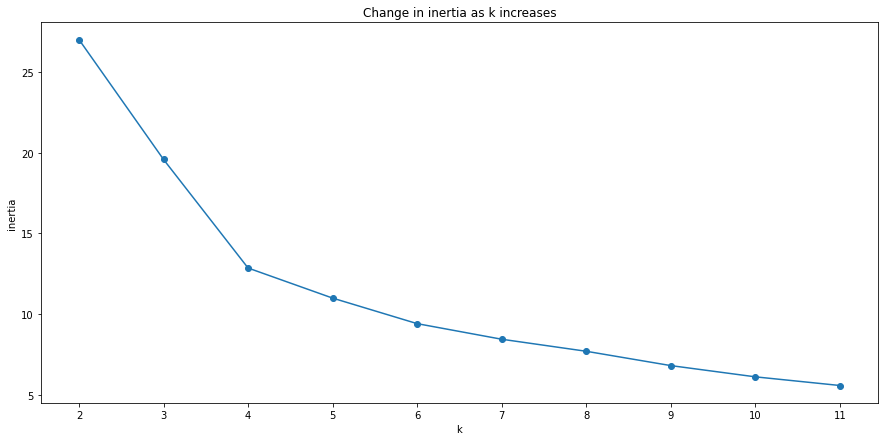

In [73]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 4**

- c) Write down the takeaways from this exercise.

- Not scaling can be disastrous
- Since scale on x axis was ~2X scale on y axis, initial clusters did not capture data correctly
- Once values were scaled to remove discrepancies betwee axes scales, clusters were captured

### x, y, k=4

In [74]:
X = df[['x', 'y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [75]:
# Scale the X
# make object and fit
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,x,y
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807


***I will just use whole dataset to train model as was done in the lesson***

In [76]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=4, random_state=527)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
#kmeans.predict(X_scaled)

KMeans(n_clusters=4, random_state=527)

In [77]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

#X_scaled['cluster'] = kmeans.predict(X_scaled)

- Visualize the results of your clustering

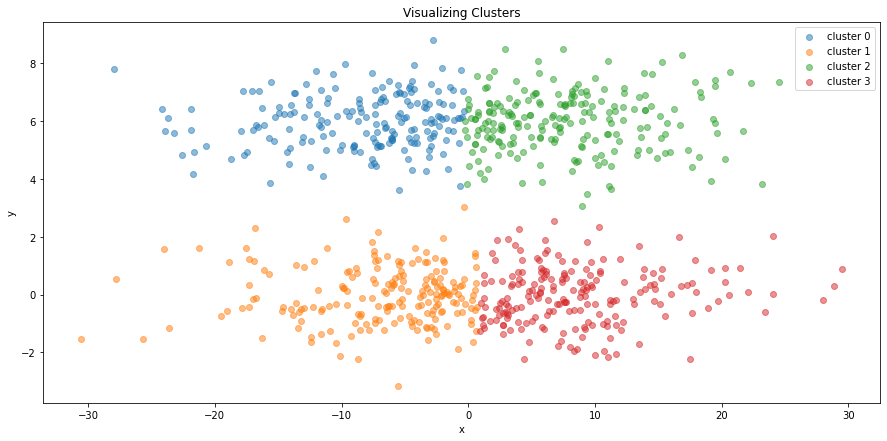

In [78]:
plt.figure(figsize=(15, 7))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(x=subset.x, y=subset.y, label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Clusters');

In [79]:
# get centroids on unscaled data
centroids = df.groupby('cluster')['x', 'y'].mean()
centroids

,x,y
cluster,,
0,-8.552988,5.980207
1,-6.905768,-0.023948
2,7.826922,5.967410
3,8.682837,-0.030077


In [80]:
# another way
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids

,x,y
0,-8.552988,5.980207
1,-6.905768,-0.023948
2,7.826922,5.967410
3,8.682837,-0.030077


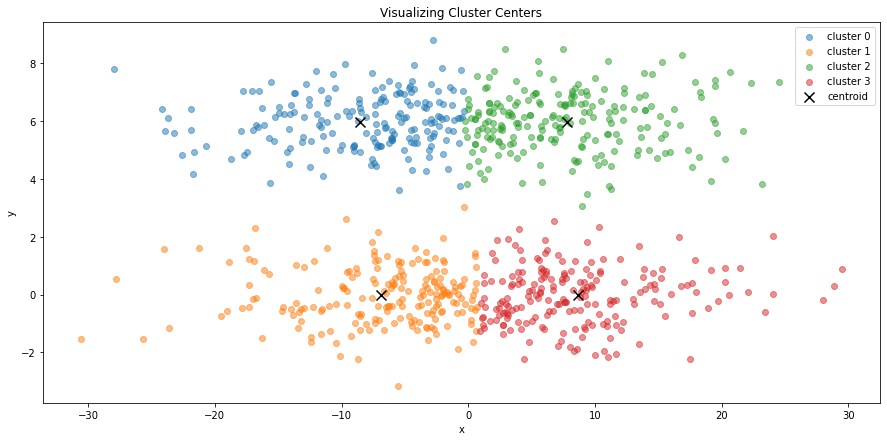

In [81]:
plt.figure(figsize=(15,7))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(x=subset.x, y=subset.y, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(x='x', y='y', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Cluster Centers');

In [82]:
kmeans.inertia_

12.860252240681692

- Use the elbow method to visually select a good value for k.

In [83]:
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)})

2     27.002656
3     19.581061
4     12.860252
5     10.998849
6      9.420575
7      8.451497
8      7.664438
9      6.846962
10     6.130256
11     5.549114
dtype: float64

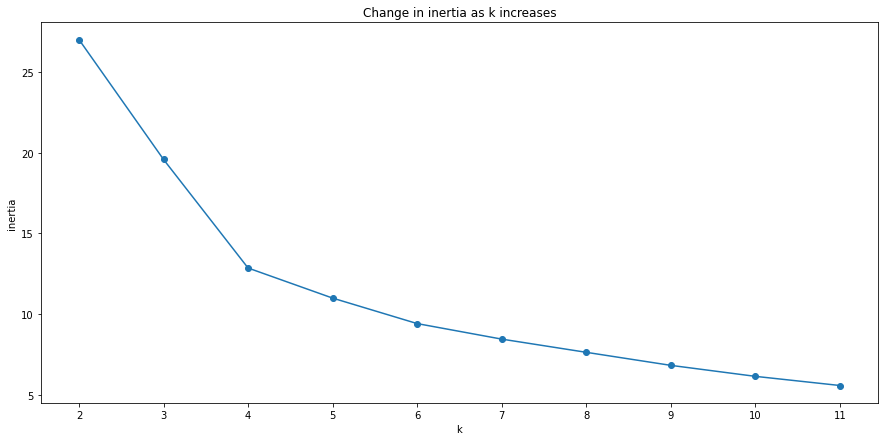

In [84]:
# lets plot inertia vs k

plt.figure(figsize=(15, 7))
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='o')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

**Best k value is 4**